In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams, rc

from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
rcParams['figure.figsize'] = 15, 10

In [28]:
rootname = "U:\\GWP\\Groundwater\\UMSS_Manti\\Data\\"

In [29]:
PRISM = pd.read_excel(rootname + "Hydrology\\PRISMbyHUC.xls",1)

In [30]:
PRISM['Date'] = pd.to_datetime(PRISM['Date'])

In [44]:
PRISM.columns

Index([u'1406000702', u'1406000704', u'1406000706', u'1406000707',
       u'1406000901', u'1406000902', u'1406000903', u'1406000904',
       u'1407000201', u'1407000202', u'1602020201', u'1602020202',
       u'1603000304', u'1603000306', u'1603000402', u'1603000403',
       u'1603000404', u'1603000405',      u'Total',      u'month'],
      dtype='object')

In [56]:
PRISM['14060007'] = PRISM['1406000702']+PRISM['1406000704']+PRISM['1406000706']+PRISM['1406000707']
PRISM['14060009'] = PRISM['1406000901']+PRISM['1406000902']+PRISM['1406000903']+PRISM['1406000904']
PRISM['14070002'] = PRISM['1407000201']+PRISM['1407000202']
PRISM['14'] = PRISM['14060007'] + PRISM['14060009'] + PRISM['14070002']
PRISM['16020202'] = PRISM['1602020201']+PRISM['1602020202']
PRISM['16030003'] = PRISM['1603000304']+PRISM['1603000306']
PRISM['16030004'] = PRISM['1603000402']+PRISM['1603000403']+PRISM['1603000404']+PRISM['1603000405']
PRISM['16'] = PRISM['16020202'] + PRISM['16030003'] + PRISM['16030004']
PRISM['1'] = PRISM['14'] + PRISM['16'] 

In [31]:
PRISM.reset_index(inplace=True)
PRISM.set_index(['Date'],inplace=True)


In [32]:
PRISM.drop(['YYYYMMDD','index'],inplace=True,axis=1)

In [20]:
PRISM.groupby([PRISM.index.month]).agg([np.min, np.mean, np.median, np.max, np.std, np.size]).reset_index()

index  1406000702                                                        \
                amin        mean      median         amax         std size   
0      1    6.189616  870.468016  719.276213  2468.579610  508.758405  120   
1      2  195.047706  901.171644  791.754603  2200.275741  464.080257  120   
2      3  100.156607  865.602201  809.846946  1985.466556  379.675203  120   
3      4  128.797344  705.618319  652.926160  1662.200993  336.504283  120   
4      5   57.617679  568.302915  517.280325  1705.037713  322.205933  120   
5      6    0.000000  374.464469  310.258736  1249.940544  294.770959  120   
6      7    4.888329  445.781994  399.445504  1333.057508  252.332234  120   
7      8   58.843237  573.399312  567.511367  1292.097537  295.016844  120   
8      9   37.812665  569.648188  505.089501  2072.182270  398.211241  120   
9     10    0.000000  651.545069  624.477854  1978.592457  422.466580  120   
10    11    0.000000  704.137711  655.434712  1949.579297  358.403838  120   
11    12   31.429521  847.477459  757.803360  2714.356995  508.233064  119   

   1406000704                         ...   1603000405               \
         amin        mean      median ...       median         amax   
0    2.402918  333.074335  295.571147 ...   465.209180  1328.597400   
1   60.923071  330.618165  297.857989 ...   469.628934  1264.248768   
2   30.812095  352.914327  334.080388 ...   643.376201  1512.179303   
3   50.187940  267.682160  238.243807 ...   547.564125  1408.125588   
4   21.944281  241.264710  219.437268 ...   451.979577  1454.509883   
5   -0.000777  178.760631  137.035677 ...   186.994513   862.004955   
6   10.087632  236.209551  208.221611 ...   275.549584   950.042614   
7   30.552162  284.310727  282.793078 ...   347.768449   904.152918   
8   18.021982  262.955226  244.353288 ...   342.563756  1489.407990   
9    0.000000  303.830608  287.939565 ...   405.963342  1554.720268   
10   0.000000  252.990227  244.875192 ...   434.619953  1229.958416   
11   9.812352  316.445987  285.521980 ...   479.373837  1560.709901   

                           Total                                            \
           std size         amin          mean        median          amax   
0   286.380763  120   711.167472  13685.433530  12583.830604  35701.006438   
1   244.033823  120  2895.158536  13789.798921  12341.941948  33052.853436   
2   303.115001  120  1271.676281  15246.921524  14737.704529  34929.769465   
3   280.551983  120  2237.940973  12673.568501  12094.708896  27875.470082   
4   285.631443  120  1068.643657  10917.316101  10520.795955  32768.410326   
5   221.642521  120     0.387189   6651.712099   5146.969051  21377.839832   
6   168.995330  120   554.276092   8894.373485   8160.083495  26004.892872   
7   183.872433  120  1525.730947  10788.383798  10522.380357  25456.189762   
8   274.189211  120   654.326701  10435.855113   9157.435079  37387.388478   
9   298.604334  120     0.000000  11971.263789  10928.406317  39115.314960   
10  229.430399  120     0.000000  11630.315078  10512.483670  29551.450640   
11  301.467006  119   427.198582  13335.203333  12289.494799  40581.190375   

                      
            std size  
0   7758.190122  120  
1   6697.955881  120  
2   6727.505903  120  
3   6010.039491  120  
4   6247.631811  120  
5   5414.366820  120  
6   4775.660347  120  
7   5381.302872  120  
8   7211.107592  120  
9   7926.583136  120  
10  5759.152608  120  
11  7636.024252  119  

[12 rows x 115 columns]

['1', '14', '14060007', u'1406000702', u'1406000704', u'1406000706', u'1406000707', '14060009', u'1406000901', u'1406000902', u'1406000903', u'1406000904', '14070002', u'1407000201', u'1407000202', '16', '16020202', u'1602020201', u'1602020202', '16030003', u'1603000304', u'1603000306', '16030004', u'1603000402', u'1603000403', u'1603000404', u'1603000405', 'East', u'Total', 'West']


C:\Python27\ArcGIS10.3\lib\site-packages\IPython\kernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


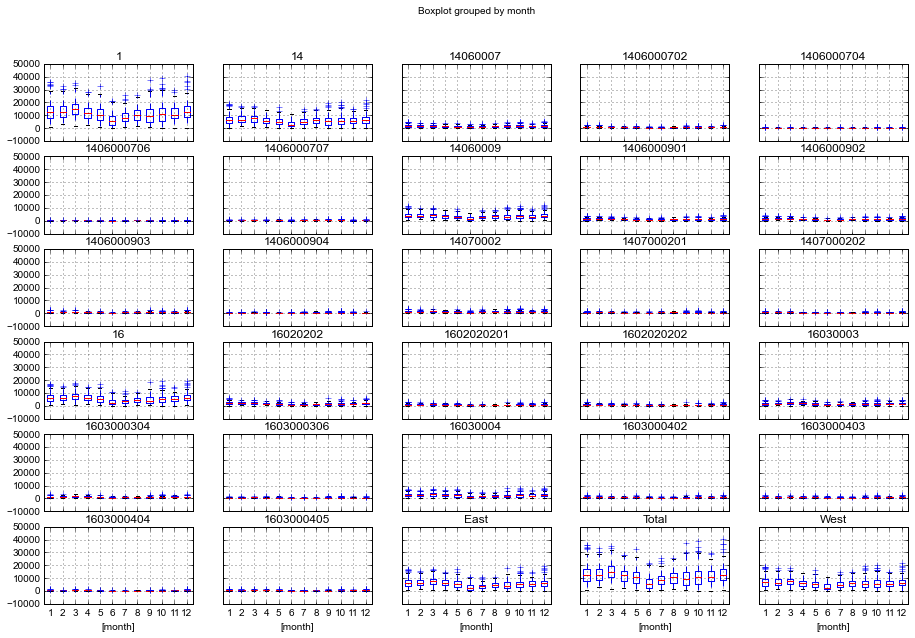

In [67]:
PRISM['month'] = PRISM.index.month
PRISM.boxplot(by='month')

names = list(set(list(PRISM.columns)) - set(['month']))
names = sorted(names)
print names

months = {'1':'January', '2':'February', '3':'March', '4':'April', '5':'May', '6':'June', 
         '7':'July', '8':'August', '9':'September', '10':'October', '11':'November', '12':'December', 'Total':'Total'}

rc('font', family='Arial')
pdf = PdfPages(rootname+'pptPRISMboxes.pdf')
j = {}

for i in range(len(names)):
    fms = PRISM[[names[i],'month']]
    fms.dropna(inplace=True)
    if len(fms)>30:
        j[names[i]] = fms.groupby('month')[names[i]].agg([np.min, np.mean, np.median, np.max, np.std, np.size]).reset_index()
        labs = [months[(str(j[names[i]]['month'][b]))] + " (n=" + str(int(j[names[i]]['size'][b])) + ")" for b in range(len(j[names[i]]['month']))]
        tickloc = [b+1 for b in range(len(j[names[i]]['month']))]
        ax = fms.boxplot(column=names[i], by='month', rot=45)
        plt.title(names[i])
        plt.suptitle('')
        plt.xticks(tickloc, labs)
        fig = ax.get_figure()
        units = names[i]
        if np.max(fms[names[i]].values) < 5000:
            plt.ylim(0,5000)
        elif np.max(fms[names[i]].values) < 25000: 
            plt.ylim(0,25000)
        else:
            plt.ylim(0,50000)
        plt.xlabel('month')     
        plt.ylabel('Precipitation (ac-ft)')

        #plt.tight_layout()      
        pdf.savefig(fig)
        plt.close()
pdf.close()
parsum = pd.concat(j)
parsum.to_csv(rootname + "PRISM_stats.csv")

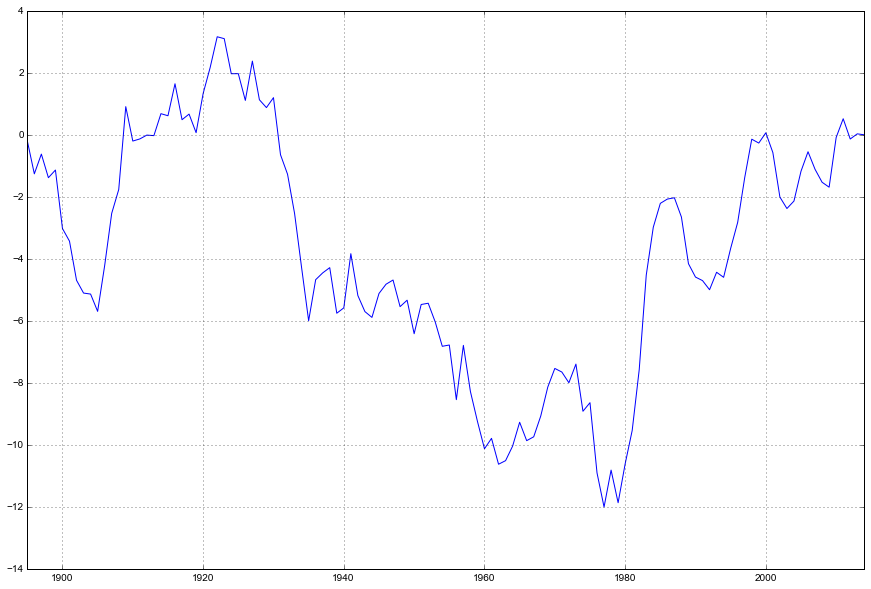

In [73]:
yearlyPPT = PRISM.groupby([PRISM.index.year]).mean()
x = yearlyPPT.index
y = yearlyPPT.Total

PPTmean = np.mean(yearlyPPT['Total'].values)
PPTstd = np.std(yearlyPPT['Total'].values)

yearlyPPT['cdmPPT'] = yearlyPPT['Total'].apply(lambda x: (x-PPTmean)/PPTstd).cumsum()
yearlyPPT['cdmPPT'].plot()


C:\Python27\ArcGIS10.3\lib\site-packages\IPython\kernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


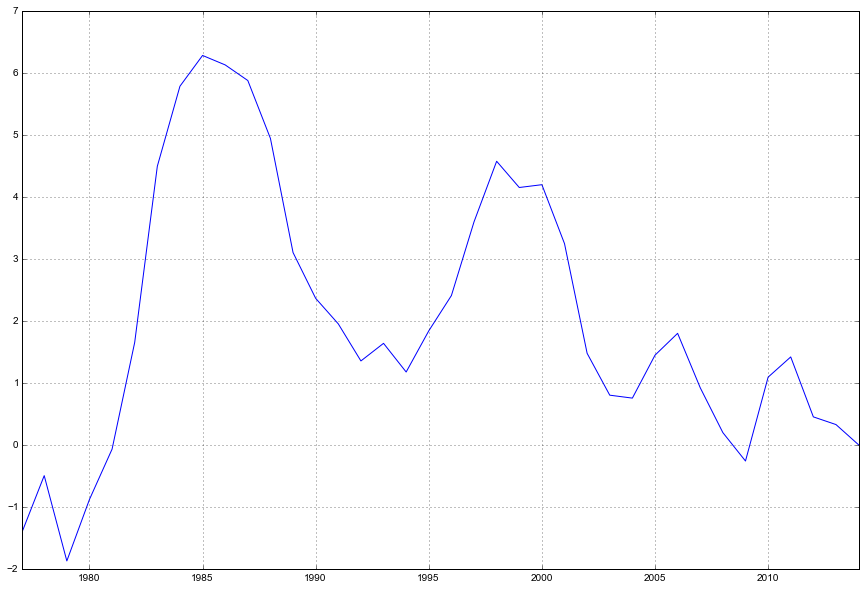

In [76]:
yearlyPPT77 = yearlyPPT.loc[1977:2015]
x = yearlyPPT77.index
y = yearlyPPT77.Total

PPTmean = np.mean(yearlyPPT77['Total'].values)
PPTstd = np.std(yearlyPPT77['Total'].values)

yearlyPPT77['cdmPPT'] = yearlyPPT77['Total'].apply(lambda x: (x-PPTmean)/PPTstd).cumsum()
yearlyPPT77['cdmPPT'].plot()
